In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-images-and-types/pokemon.csv
/kaggle/input/pokemon-images-and-types/images/throh.png
/kaggle/input/pokemon-images-and-types/images/samurott.png
/kaggle/input/pokemon-images-and-types/images/venomoth.png
/kaggle/input/pokemon-images-and-types/images/latios.png
/kaggle/input/pokemon-images-and-types/images/shinx.png
/kaggle/input/pokemon-images-and-types/images/durant.png
/kaggle/input/pokemon-images-and-types/images/primarina.png
/kaggle/input/pokemon-images-and-types/images/geodude.png
/kaggle/input/pokemon-images-and-types/images/popplio.png
/kaggle/input/pokemon-images-and-types/images/wingull.png
/kaggle/input/pokemon-images-and-types/images/miltank.png
/kaggle/input/pokemon-images-and-types/images/castform.png
/kaggle/input/pokemon-images-and-types/images/squirtle.png
/kaggle/input/pokemon-images-and-types/images/shaymin-land.png
/kaggle/input/pokemon-images-and-types/images/raikou.png
/kaggle/input/pokemon-images-and-types/images/guzzlord.png
/kaggle/input/po

In [2]:
# Ruta base al dataset
dataset_path = "/kaggle/input/pokemon-images-and-types/"

# Cargar el CSV
csv_path = os.path.join(dataset_path, "pokemon.csv")
df = pd.read_csv(csv_path)

# Ruta de la carpeta de imágenes
images_folder = os.path.join(dataset_path, "images")

# Crear columna con ruta de imagen
def get_image_path(pokemon_name):
    # Normaliza nombre a minúsculas, quita espacios y añade extensión
    filename = f"{pokemon_name.lower().strip()}.png"
    path = os.path.join(images_folder, filename)
    return path if os.path.exists(path) else None  # None si no existe

df["images"] = df["Name"].apply(get_image_path)

# Mostrar resultado
df.head()

,Name,Type1,Type2,Evolution,images
0,bulbasaur,Grass,Poison,ivysaur,/kaggle/input/pokemon-images-and-types/images/...
1,ivysaur,Grass,Poison,venusaur,/kaggle/input/pokemon-images-and-types/images/...
2,venusaur,Grass,Poison,NaN,/kaggle/input/pokemon-images-and-types/images/...
3,charmander,Fire,NaN,charmeleon,/kaggle/input/pokemon-images-and-types/images/...
4,charmeleon,Fire,NaN,charizard,/kaggle/input/pokemon-images-and-types/images/...


In [3]:
conteo_tipos = df["Type1"].value_counts()
print(conteo_tipos)

Type1
Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Dragon       27
Ghost        27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: count, dtype: int64


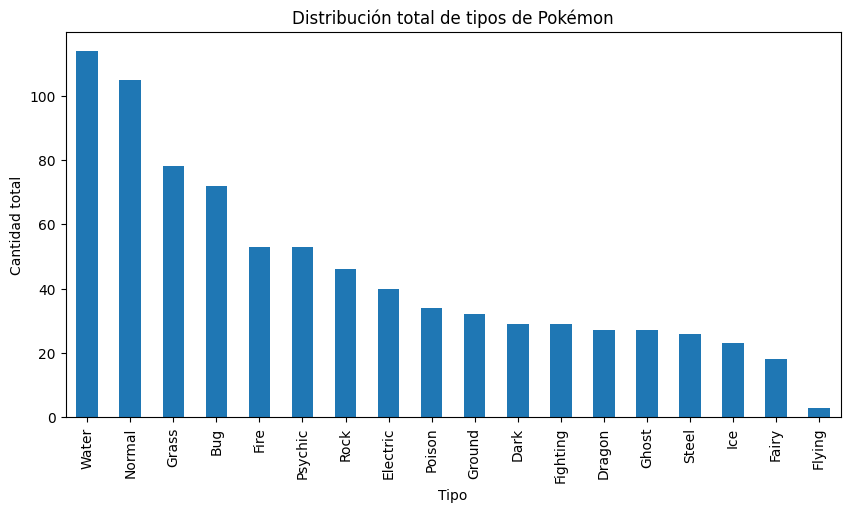

In [4]:
import matplotlib.pyplot as plt

conteo_tipos.plot(kind="bar", figsize=(10,5))
plt.title("Distribución total de tipos de Pokémon")
plt.xlabel("Tipo")
plt.ylabel("Cantidad total")
plt.show()

In [5]:
# Contar número de ejemplos por clase
conteo_tipos = df["Type1"].value_counts()

# Filtrar tipos con al menos 40 ejemplos
tipos_validos = conteo_tipos[conteo_tipos >= 70].index

# Crear un nuevo DataFrame con solo esos tipos
df_filtrado = df[df["Type1"].isin(tipos_validos)].reset_index(drop=True)

# Mostrar resumen
print("Clases eliminadas:", set(df["Type1"]) - set(df_filtrado["Type1"]))
print("Clases finales:", df_filtrado["Type1"].unique())
print("Tamaño final del dataset:", len(df_filtrado))

Clases eliminadas: {'Fire', 'Dragon', 'Fairy', 'Fighting', 'Dark', 'Rock', 'Ice', 'Electric', 'Ghost', 'Poison', 'Psychic', 'Flying', 'Steel', 'Ground'}
Clases finales: ['Grass' 'Water' 'Bug' 'Normal']
Tamaño final del dataset: 369


In [6]:
import os
import shutil

for folder in ['train', 'val', 'test']:
    if os.path.exists(folder):
        shutil.rmtree(folder)

for folder in ['train', 'val', 'test']:
    os.makedirs(folder, exist_ok=True)
    for class_ in df_filtrado['Type1'].unique():
        os.makedirs(f'{folder}/{class_}/', exist_ok=True)

In [7]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    df_filtrado, 
    df_filtrado['Type1'],
    test_size=0.10,  # 10% para test
    stratify=df_filtrado['Type1'],
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, 
    y_temp,
    test_size=0.222,  # 20% del total (0.9 * 0.222 ≈ 0.20)
    stratify=y_temp,
    random_state=42
)

print(f"\n✅ Train: {len(X_train)} imágenes")
print(f"✅ Val:   {len(X_val)} imágenes")
print(f"✅ Test:  {len(X_test)} imágenes")

# Verificar balance por clase
print("\n📊 Balance en TRAIN:")
print(y_train.value_counts().sort_index())
print("\n📊 Balance en VAL:")
print(y_val.value_counts().sort_index())
print("\n📊 Balance en TEST:")
print(y_test.value_counts().sort_index())


✅ Train: 258 imágenes
✅ Val:   74 imágenes
✅ Test:  37 imágenes

📊 Balance en TRAIN:
Type1
Bug       51
Grass     54
Normal    73
Water     80
Name: count, dtype: int64

📊 Balance en VAL:
Type1
Bug       14
Grass     16
Normal    21
Water     23
Name: count, dtype: int64

📊 Balance en TEST:
Type1
Bug        7
Grass      8
Normal    11
Water     11
Name: count, dtype: int64


In [8]:
from shutil import copyfile, copy2

for image, type_ in zip(X_train['images'], y_train):
    copy2(image, f'train/{type_}')

for image, type_ in zip(X_val['images'], y_val):
    copy2(image, f'val/{type_}')
    
for image, type_ in zip(X_test['images'], y_test):
    copy2(image, f'test/{type_}')

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

IMG_SIZE = (128, 128)
BATCH_SIZE = 16

datagen = ImageDataGenerator()

train = datagen.flow_from_directory(
    'train/'
)

val = datagen.flow_from_directory(
    'val/'
)

test = datagen.flow_from_directory(
    'test/'
)

num_classes = train.num_classes

model = Sequential([
    Input(shape=(*IMG_SIZE, 3)),
    
    # Bloque 1 - Mantener simple al inicio
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    # Bloque 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    
    # Bloque 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    
    # Global Average Pooling (mejor que Flatten)
    GlobalAveragePooling2D(),
    
    # Capas densas con regularización
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4),
    
    # Salida
    Dense(num_classes, activation='softmax')
])

model.summary()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Esperar 15 épocas sin mejora
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir LR a la mitad
    patience=5,
    min_lr=1e-7,
    verbose=1
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n=== Iniciando entrenamiento ===")
history = model.fit(
    train,
    epochs=100,  # Muchas épocas, pero EarlyStopping lo detendrá
    validation_data=val,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n=== Evaluando en conjunto de prueba ===")
test_loss, test_acc = model.evaluate(test)
print(f"\n🎯 Loss en TEST: {test_loss:.4f}")
print(f"🎯 Exactitud en TEST: {test_acc:.2%}")

2025-11-07 08:01:10.774167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762502471.018858      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762502471.086034      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 258 images belonging to 4 classes.
Found 74 images belonging to 4 classes.
Found 37 images belonging to 4 classes.


I0000 00:00:1762502484.191993      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 208,164 (813.14 KB)

 Trainable params: 207,012 (808.64 KB)

 Non-trainable params: 1,152 (4.50 KB)


=== Iniciando entrenamiento ===
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1762502492.353072     122 service.cc:148] XLA service 0x7e48f0105f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762502492.354213     122 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762502493.070145     122 cuda_dnn.cc:529] Loaded cuDNN version 90300


2/9 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1719 - loss: 5.4715 

I0000 00:00:1762502504.920690     122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2398 - loss: 5.1581 - val_accuracy: 0.3108 - val_loss: 4.6192 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3955 - loss: 4.6597 - val_accuracy: 0.3108 - val_loss: 4.4309 - learning_rate: 0.0010
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.3505 - loss: 4.4977 - val_accuracy: 0.3108 - val_loss: 4.2975 - learning_rate: 0.0010
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.3596 - loss: 4.2827 - val_accuracy: 0.3108 - val_loss: 4.1221 - learning_rate: 0.0010
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5259 - loss: 3.8594 - val_accuracy: 0.2973 - val_loss: 3.9662 - learning_rate: 0.0010
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4286 - loss: 3.9382 - val_accuracy: 0.3108 - val_loss: 3.8798 - learning_rate: 0.0010
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4898 - loss: 3.6219 - val_accuracy: 0.2973 - val

In [10]:
# Predicción sobre tu conjunto de prueba
predictions = model.predict(test)

# Para obtener la clase predicha (índice)
import numpy as np
y_pred = np.argmax(predictions, axis=1)

# Si tus labels son categóricos (one-hot)
y_true = test.classes

# Para mapear los índices a nombres de clases
class_names = list(test.class_indices.keys())

print("Ejemplo de predicciones:")
for i in range(10):
    print(f"Pred: {class_names[y_pred[i]]}, Real: {class_names[y_true[i]]}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
Ejemplo de predicciones:
Pred: Normal, Real: Bug
Pred: Water, Real: Bug
Pred: Water, Real: Bug
Pred: Water, Real: Bug
Pred: Grass, Real: Bug
Pred: Normal, Real: Bug
Pred: Water, Real: Bug
Pred: Water, Real: Grass
Pred: Normal, Real: Grass
Pred: Grass, Real: Grass


In [11]:
import plotly.graph_objects as go

# Crear lista de épocas
epochs = list(range(len(history.history['accuracy'])))

# Crear figura
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history.history['accuracy'], mode='lines', name='Entrenamiento'))
fig.add_trace(go.Scatter(x=epochs, y=history.history['val_accuracy'], mode='lines', name='Validación'))

# Personalizar diseño
fig.update_layout(
    title='Evolución de exactitud del modelo',
    xaxis_title='Época',
    yaxis_title='Exactitud',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    width=600,
    height=400
)

fig.show()


In [12]:
datagentrain = ImageDataGenerator(rotation_range=35, 
                                 zoom_range=[0.5, 1.0], 
                                 brightness_range=[0.2,1.5],
                                 vertical_flip=True,
                                 horizontal_flip=True,
                                 shear_range=0.2)

datagen = ImageDataGenerator()

train = datagentrain.flow_from_directory('train/')
test = datagen.flow_from_directory('test/')
val = datagen.flow_from_directory('val/')

Found 258 images belonging to 4 classes.
Found 37 images belonging to 4 classes.
Found 74 images belonging to 4 classes.


In [13]:
model = Sequential([
    Input(shape=(*IMG_SIZE, 3)),
    
    # Bloque 1 - Mantener simple al inicio
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    # Bloque 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    
    # Bloque 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    
    # Global Average Pooling (mejor que Flatten)
    GlobalAveragePooling2D(),
    
    # Capas densas con regularización
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4),
    
    # Salida
    Dense(num_classes, activation='softmax')
])

model.summary()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Esperar 15 épocas sin mejora
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir LR a la mitad
    patience=5,
    min_lr=1e-7,
    verbose=1
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n=== Iniciando entrenamiento ===")
history = model.fit(
    train,
    epochs=100,
    validation_data=val,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n=== Evaluando en conjunto de prueba ===")
test_loss, test_acc = model.evaluate(test)
print(f"\n🎯 Loss en TEST: {test_loss:.4f}")
print(f"🎯 Exactitud en TEST: {test_acc:.2%}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 208,164 (813.14 KB)

 Trainable params: 207,012 (808.64 KB)

 Non-trainable params: 1,152 (4.50 KB)


=== Iniciando entrenamiento ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2040 - loss: 5.6779 - val_accuracy: 0.2162 - val_loss: 4.7530 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 420ms/step - accuracy: 0.3078 - loss: 4.9322 - val_accuracy: 0.2432 - val_loss: 4.4866 - learning_rate: 0.0010
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 486ms/step - accuracy: 0.3765 - loss: 4.6512 - val_accuracy: 0.3649 - val_loss: 4.3393 - learning_rate: 0.0010
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 418ms/step - accuracy: 0.3486 - loss: 4.6498 - val_accuracy: 0.3108 - val_loss: 4.2731 - learning_rate: 0.0010
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - accuracy: 0.3097 - loss: 4.7497 - val_accuracy: 0.2838 - val_loss: 4.2193 - learning_rate: 0.0010
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 413ms/step - accuracy: 0.4541 - loss: 4.2722 - val_accuracy: 0.2973 - val_loss: 4.1396 - learning_rate: 0.0010
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 458ms/step - accuracy: 0.3989 - loss: 4.1596 - val_accur

In [14]:
import plotly.graph_objects as go

# Crear lista de épocas
epochs = list(range(len(history.history['accuracy'])))

# Crear figura
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history.history['accuracy'], mode='lines', name='Entrenamiento'))
fig.add_trace(go.Scatter(x=epochs, y=history.history['val_accuracy'], mode='lines', name='Validación'))

# Personalizar diseño
fig.update_layout(
    title='Evolución de exactitud del modelo',
    xaxis_title='Época',
    yaxis_title='Exactitud',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    width=600,
    height=400
)

fig.show()

In [15]:
from sklearn.metrics import classification_report

# 1. Obtener predicciones del modelo
predict = model.predict(test)

# 2. Crear DataFrame con las clases predichas (en índices)
predict_frame = pd.DataFrame()
predict_frame['pred_idx'] = np.argmax(predict, axis=-1)

# 3. Crear diccionario de etiquetas {índice: nombre_clase}
labels = dict((v, k) for k, v in test.class_indices.items())

# 4. Convertir índices a nombres de clase
predict_frame['category'] = predict_frame['pred_idx'].replace(labels)

# 5. Obtener etiquetas reales desde el generador
y_true = test.classes  # índices verdaderos
y_true_labels = [labels[idx] for idx in y_true]

# 6. Métricas de clasificación
print(classification_report(y_true_labels, predict_frame['category']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
              precision    recall  f1-score   support

         Bug       0.31      0.57      0.40         7
       Grass       0.67      0.50      0.57         8
      Normal       0.33      0.18      0.24        11
       Water       0.42      0.45      0.43        11

    accuracy                           0.41        37
   macro avg       0.43      0.43      0.41        37
weighted avg       0.43      0.41      0.40        37



In [16]:
model.save('pokemon_baseline.h5')

In [17]:
# 1. Definir el tamaño de imagen y batch size
IMG_HEIGHT = 380
IMG_WIDTH = 380
BATCH_SIZE = 32

# 2. Quitar 'rescale' del generador
# EfficientNet se encarga de su propia normalización interna.
datagentrain = ImageDataGenerator(
    rotation_range=35,
    zoom_range=[0.5, 1.0],
    brightness_range=[0.2, 1.5],
    vertical_flip=True,
    horizontal_flip=True,
    shear_range=0.2
)

datagen = ImageDataGenerator()

# 3. Usar 'target_size' en .flow_from_directory()
train = datagentrain.flow_from_directory(
    'train/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test = datagen.flow_from_directory(
    'test/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val = datagen.flow_from_directory(
    'val/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 258 images belonging to 4 classes.
Found 37 images belonging to 4 classes.
Found 74 images belonging to 4 classes.


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# --- Importar el modelo base ---
from tensorflow.keras.applications import EfficientNetB4
IMG_SIZE = (380, 380) 

# --- 1. Cargar el Modelo Base ---
base_model = EfficientNetB4(
    include_top=False,
    weights='imagenet',
    input_shape=(*IMG_SIZE, 3)
)

# --- 2. Congelar el Modelo Base ---
base_model.trainable = False

# --- 3. Construir el Modelo Final ---
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# --- 4. Compilar (Fase 1) ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# --- 5. Callbacks (Tus mismos callbacks) ---
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# --- 6. Entrenamiento Transfer Learning) ---
print("\n=== Iniciando entrenamiento (Fase 1: Entrenando la cabeza) ===")
history = model.fit(
    train,
    epochs=100,
    validation_data=val,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n--- Evaluación después de la Fase 1 ---")
test_loss, test_acc = model.evaluate(test)
print(f"🎯 Loss en TEST (Fase 1): {test_loss:.4f}")
print(f"🎯 Exactitud en TEST (Fase 1): {test_acc:.2%}")

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 12, 12, 1792)   │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,167,267 (69.30 MB)

 Trainable params: 492,932 (1.88 MB)

 Non-trainable params: 17,674,335 (67.42 MB)


=== Iniciando entrenamiento (Fase 1: Entrenando la cabeza) ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 96s 5s/step - accuracy: 0.2885 - loss: 8.2858 - val_accuracy: 0.2703 - val_loss: 7.4634 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 978ms/step - accuracy: 0.4010 - loss: 7.8303 - val_accuracy: 0.3108 - val_loss: 7.3391 - learning_rate: 0.0010
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5609 - loss: 7.3290 - val_accuracy: 0.4459 - val_loss: 7.1475 - learning_rate: 0.0010
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 982ms/step - accuracy: 0.4776 - loss: 7.1728 - val_accuracy: 0.4595 - val_loss: 6.9760 - learning_rate: 0.0010
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4219 - loss: 7.1282 - val_accuracy: 0.4730 - val_loss: 6.8331 - learning_rate: 0.0010
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 981ms/step - accuracy: 0.4869 - loss: 6.8910 - val_accuracy: 0.4054 - val_loss: 6.6932 - learning_rate: 0.0010
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 974ms/step - accuracy: 0.5137 - loss: 6.6045 - val_accuracy: 0

In [19]:
import plotly.graph_objects as go

# Crear lista de épocas
epochs = list(range(len(history.history['accuracy'])))

# Crear figura
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history.history['accuracy'], mode='lines', name='Entrenamiento'))
fig.add_trace(go.Scatter(x=epochs, y=history.history['val_accuracy'], mode='lines', name='Validación'))

# Personalizar diseño
fig.update_layout(
    title='Evolución de exactitud del modelo',
    xaxis_title='Época',
    yaxis_title='Exactitud',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    width=600,
    height=400
)

fig.show()

In [20]:
from sklearn.metrics import classification_report

# 1. Obtener predicciones del modelo
predict = model.predict(test)

# 2. Crear DataFrame con las clases predichas (en índices)
predict_frame = pd.DataFrame()
predict_frame['pred_idx'] = np.argmax(predict, axis=-1)

# 3. Crear diccionario de etiquetas {índice: nombre_clase}
labels = dict((v, k) for k, v in test.class_indices.items())

# 4. Convertir índices a nombres de clase
predict_frame['category'] = predict_frame['pred_idx'].replace(labels)

# 5. Obtener etiquetas reales desde el generador
y_true = test.classes
y_true_labels = [labels[idx] for idx in y_true]

# 6. Métricas de clasificación
print(classification_report(y_true_labels, predict_frame['category']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 12s/step
              precision    recall  f1-score   support

         Bug       0.29      0.29      0.29         7
       Grass       0.20      0.25      0.22         8
      Normal       0.56      0.45      0.50        11
       Water       0.45      0.45      0.45        11

    accuracy                           0.38        37
   macro avg       0.37      0.36      0.37        37
weighted avg       0.40      0.38      0.39        37



In [22]:
model.save('pokemon_efficientnet.h5')